<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Images Classification Model using Keras and Artificial Neural Network</header1></left>

Presentado por: Angie Tatiana Medina Giraldo  <br>
Fecha: 30/05/2022

# Importación de librerias necesarias

# Parte II. Clasificación

In [1]:
#Para esta actividad se importarán las siguientes librerías:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import layers

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay, classification_report

print(tf.__version__)

2.6.0


## Cargar el Dataset
 

In [2]:
#Código para cargar el Dataset
df = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test)  = df.load_data()

## Descripción de la fuente del Dataset

Para esta actividad se utiliza el dataset cifar10. Se puede encontrar en el siguiente enlace y cargar directamente desde keras: https://keras.io/api/datasets/cifar10/

## Explique el problema a resolver. 

Se plantea un problema de clasificación a partir del dataset CIFAR-10 de keras donde se busca predecir una imagen.  El problema presenta 10 clases que correponden a las siguientes categorías de imágenes: airplane, automobile,bird,cat,deer,dog,frog,horse,ship, truck. El dataset contiene 60000 imagenes a color en una resolucion de 32 por 32 pixeles en 3 canales dividido en 10 clases.

## Caracterización del Dataset

Número de instancias en total: 60000 imagenes
Número de atributos de entrada, su significado y tipo: 32 x 32 pixeles in 3 canales
Número de clases de la variable objetivo: 10
Clases de la variable objetivo: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

Número de instancias pertenecientes a cada clase en la variable objetivo: cada clase presenta 6000 imágenes



In [3]:
# Tamaño del conjunto de pruebas y entrenamiento
print('Total number of Images in the Dataset:', len(x_train) + len(x_test))
print('Number of train images:', len(x_train))
print('Number of test images:', len(x_test))
print('Shape of training dataset:',x_train.shape)
print('Shape of testing dataset:',x_test.shape)

Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


In [4]:
#Codigo para evaluar si hay valores nulos en datos de entreamiento
np.isnan(x_train).any()

False

In [5]:
#Codigo para evaluar si hay valores nulos en datos de prueba
np.isnan(x_test).any()

False

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

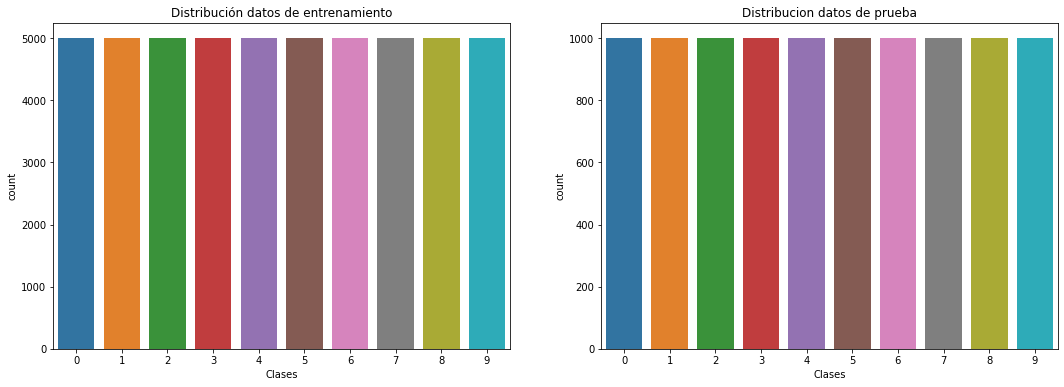

In [7]:
#Codigo para graficar las clases en conjunto de entrenamiento y test

warnings.filterwarnings('ignore')

figure, axis = plt.subplots( 1, 2 , figsize = (18,6))
sns.countplot(y_train.ravel(),ax = axis[0])
axis[0].set_title('Distribución datos de entrenamiento')
axis[0].set_xlabel('Clases')


# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axis[1])
axis[1].set_title('Distribucion datos de prueba')
axis[1].set_xlabel('Clases')
plt.show()

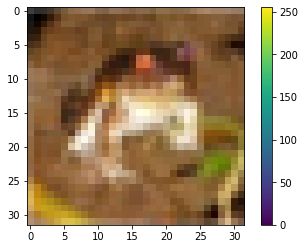

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

El dataset contiene 60000 instancias o imágenes a color en una resolución de 32 por 32 pixeles en 3 canales dividido en 3 clases. Cada clase tiene 6000 imágenes lo que india que está balanceda (5000 para el conjueno de entrenamiento y 10000 para el conjunto de prueba)

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [9]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. 
# Codigo para Normalizacion
x_train = x_train/255.0
x_test = x_test/255.0

## División del dataset en datos de entrenamiento y datos de test 

El dataset ya está dividido en 50000 imagenes para el conjunto de entrenamiento y 10000 imagenes para test


## Propuesta de arquitectura de red neuronal

Describe: 

La primera capa de esta red Flatten,  transforma el formato de las imagenes de un arreglo tri-dimensional (de 32 por 32 pixeles x 3 RGD) a un arreglo uni dimensional (de 32*32*3 pixeles = 3072 pixeles)

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas Dense. Estas estan densamente conectadas, o completamente conectadas, de 3000 y 1000 neuronas respectivamente y función de activación Relu 

La tercera (y ultima) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.


In [10]:
# Código de la estructuración de la red

tf.random.set_seed(10)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#Código de ajuste y entrenamiento
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#Código de la inspección del modelo de red
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


##  Ajuste de modelo de Clasificación RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

In [12]:
#Código de ajuste y entrenamiento

history= model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 64s 39ms/step - loss: 1.8114 - accuracy: 0.3558
Epoch 2/30
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6231 - accuracy: 0.4275
Epoch 3/30
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5429 - accuracy: 0.45591s
Epoch 4/30
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4799 - accuracy: 0.4798
Epoch 5/30
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4321 - accuracy: 0.4981
Epoch 6/30
1563/1563 [==============================] - 60s 38ms/step - loss: 1.3874 - accuracy: 0.5117
Epoch 7/30
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3502 - accuracy: 0.5234
Epoch 8/30
1563/1563 [==============================] - 60s 38ms/step - loss: 1.3124 - accuracy: 0.5400
Epoch 9/30
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2818 - accuracy: 0.5493
Epoch 10/30
1563/1563 [==============================] - 61s 3

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.7540  (o 75%) sobre el set de datos de entrenamiento.

Accuracy Modelo Red Neuronal Training es 0.7540

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.

Text(0.5, 0, 'epochs')

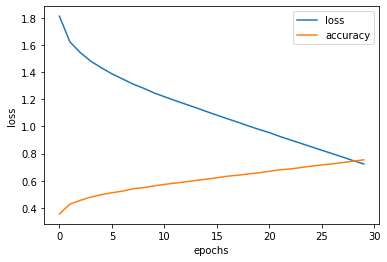

In [13]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Evalúe los resultados  para el conjunto de test.

In [14]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 1.4296 - accuracy: 0.5351

Test loss: 1.4296025037765503

Test accuracy: 0.535099983215332


In [15]:
#Codigo para la prediccion
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.75      0.62      1000
           1       0.82      0.49      0.61      1000
           2       0.57      0.30      0.40      1000
           3       0.48      0.25      0.33      1000
           4       0.40      0.56      0.47      1000
           5       0.59      0.26      0.36      1000
           6       0.60      0.62      0.61      1000
           7       0.44      0.76      0.56      1000
           8       0.74      0.60      0.66      1000
           9       0.49      0.76      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.57      0.54      0.52     10000
weighted avg       0.57      0.54      0.52     10000



In [16]:
confusion_matrix1 = tf.math.confusion_matrix(y_test, y_pred_classes)
print("Confusin_matrix \n", confusion_matrix1)

Confusin_matrix 
 tf.Tensor(
[[752   6  16   2  43   2  15  36  59  69]
 [ 76 492   9  10  15   5  11  40  48 294]
 [110   8 305  37 211  24  94 158  12  41]
 [ 68  11  40 246 149 104 109 172  18  83]
 [ 66   0  47  26 557   8  96 159  13  28]
 [ 39   3  56 124 152 258  67 235  17  49]
 [ 22   3  24  35 150  10 616  73  16  51]
 [ 42   3  24  12  70  18  12 763   4  52]
 [177  26   7   5  33   5   5  31 599 112]
 [ 68  49   4  11  10   4   6  63  22 763]], shape=(10, 10), dtype=int32)


In [17]:
print('Accuracy Modelo Red Neuronal Test: {0:0.4f}'. format(accuracy_score(y_test, y_pred_classes)))

Accuracy Modelo Red Neuronal Test: 0.5351


## Ajuste de modelos de clasificación alternativos

Elige al menos un método de clasificación no basado en redes neuronales (p.ej. regresión logística, árboles de decisión, reglas de clasificación, random forest, SVM, etc).

Random Forest Classifier

In [18]:
#sklearn espera un array de 2 dimensiones para el modelo y las predicciones
#El siguiente codigo cambia el tamaño del set de entrenamiento de (50000,32,32,3) el cual es 4D a un array de 2d (50000,3072) resultado del producto (32x32x3=3072).

nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [19]:
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [20]:
#Modelo Random Forest

model2=RandomForestClassifier(n_estimators=30, random_state=10)
model2.fit(x_train2,y_train.ravel())
y_pred2=model2.predict(x_test2)
y_pred2

array([6, 0, 9, ..., 5, 6, 7], dtype=uint8)

In [21]:
print('Accuracy Modelo 2 en test: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Accuracy Modelo 2 en test: 0.4262


In [22]:
y_pred2_train= model2.predict(x_train2)
y_pred2_train
print('Accuracy Modelo 2 en entrenamiento: {0:0.4f}'. format(accuracy_score(y_train, y_pred2_train)))

Accuracy Modelo 2 en entrenamiento: 1.0000


In [23]:
#Código para mostrar la evaluación del modelo 2

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.49      0.57      0.53      1000
           1       0.46      0.52      0.49      1000
           2       0.32      0.34      0.33      1000
           3       0.28      0.26      0.27      1000
           4       0.37      0.37      0.37      1000
           5       0.37      0.34      0.35      1000
           6       0.44      0.46      0.45      1000
           7       0.45      0.38      0.42      1000
           8       0.57      0.57      0.57      1000
           9       0.47      0.47      0.47      1000

    accuracy                           0.43     10000
   macro avg       0.42      0.43      0.42     10000
weighted avg       0.42      0.43      0.42     10000



In [24]:
#Codigo para ma Matriz de confusion

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[567,  41,  52,  31,  33,  24,  23,  28, 152,  49],
       [ 51, 517,  35,  52,  22,  31,  34,  33,  66, 159],
       [109,  50, 335,  85, 135,  70, 107,  61,  24,  24],
       [ 65,  52, 108, 261,  73, 176, 119,  67,  24,  55],
       [ 56,  34, 156,  47, 366,  71, 133,  93,  25,  19],
       [ 43,  41, 103, 190,  74, 338,  77,  76,  25,  33],
       [ 19,  53, 125,  86, 129,  57, 458,  36,   6,  31],
       [ 61,  47,  76,  84, 105,  89,  47, 382,  31,  78],
       [106, 106,  25,  40,  21,  25,  10,  17, 571,  79],
       [ 83, 188,  24,  40,  22,  24,  27,  47,  78, 467]], dtype=int64)

In [25]:
print('Accuracy Modelo Random Forest Test: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))
print('Accuracy Modelo Random Forest Training: {0:0.4f}'. format(accuracy_score(y_train, y_pred2_train)))

Accuracy Modelo Random Forest Test: 0.4262
Accuracy Modelo Random Forest Training: 1.0000


Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

Random Forest Classifier shows only 36% accuracy on the test set.


## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [26]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla

print('Accuracy Modelo Redes neuronales Test: {0:0.4f}'. format(accuracy_score(y_test, y_pred_classes)))
print('Accuracy Modelo Redes neuronales Training:0.7540')

print('Accuracy Modelo Random Forest en test: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))
      
print('Accuracy Modelo Random Forest Training: {0:0.4f}'. format(accuracy_score(y_train, y_pred2_train)))

Accuracy Modelo Redes neuronales Test: 0.5351
Accuracy Modelo Redes neuronales Training:0.7540
Accuracy Modelo Random Forest en test: 0.4262
Accuracy Modelo Random Forest Training: 1.0000


In [27]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica

Accuracy_RN_Test = accuracy_score(y_test, y_pred_classes)
Accuracy_RN_Entrenamiento =0.7540
Accuracy_RF_Test= accuracy_score(y_test, y_pred2)
Accuracy_RF_Entrenamiento = accuracy_score(y_train, y_pred2_train)

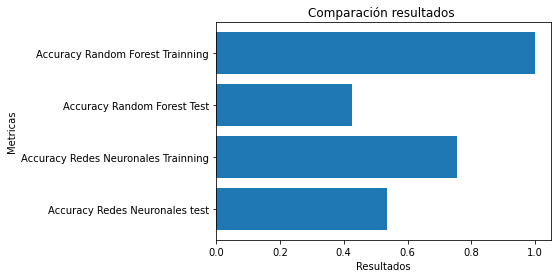

In [28]:
## Declaramos valores para el eje x
eje_x = ['Accuracy Redes Neuronales test', 'Accuracy Redes Neuronales Trainning', 'Accuracy Random Forest Test', 'Accuracy Random Forest Trainning']
eje_y = [Accuracy_RN_Test,Accuracy_RN_Entrenamiento,Accuracy_RF_Test,Accuracy_RF_Entrenamiento]
plt.barh(eje_x, eje_y)
plt.ylabel('Metricas')
plt.xlabel('Resultados')
plt.title('Comparación resultados ')
plt.show()

Construya un párrafo con los principales hallazgos.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

EL modelo de redes neuronales funciona mejor con un accuracy de 57% contra un resultado de accuracy del modelo de Random Forest del 42%. Ambos algoritmos presentan un resultado bajo.

El modelo de neuronales alcanza una exactitud de 75%  sobre el set de datos de entrenamiento y de 57% sobre el set de datos de prueba. Esta diferencia entre el entrenamiento y el test se debe a overfitting (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.


Para mejorar los resultados del modelo de redes neuronales+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.